In [54]:
import  matplotlib.pyplot as plt # For creating graphs and charts
import pandas as pd # For creating and working with dataframes
import seaborn as sn # For creating graphs and charts
import numpy as np # For working with statistics
import locale # For localizing the currency formatting

In [55]:
# The "access csv" of all the links of currently available Monthly Vendor Transactions in Open Fi$cal 
access_csv = 'https://adwoutputfilesadlsstore.blob.core.windows.net/transparency/MonthlyVendorTransactionPointer/MonthlyVendorTransactionPointer.csv'

In [56]:
# Read, clean, and transform the "access csv" into Pandas dataframe
access_csv_df= pd.DataFrame(pd.read_csv(access_csv))

list_months = [] # Create list for holding month values from "access csv"
list_years = [] # Create list for holding year values from "access csv"

links = access_csv_df['Download'] # Access the column of links in "access csv"

for i in links: # Get columns from "access csv" that we need using a FOR LOOP
    links_months = i[-6:-4] # Get month values from links
    links_years = "20" + i[-9:-7] # Get year values from links

    list_months.append(links_months) # Append month values into list -> 'list_months'
    list_years.append(links_years) # Append year values into list -> 'list_years'

# Create dictionary of collected values from FOR LOOP and links in "access csv"
dict = {"YEAR" : list_years,
        "MONTH" : list_months,
        "URL" : access_csv_df['Download']}

# Use Pandas function '.DataFrame' to build usable dataframe
MonthlyVendors_df = pd.DataFrame(dict)

MonthlyVendors_df.head() # Display first 5 rows of' MonthlyVendors_df'

,YEAR,MONTH,URL
0,2023,05,https://adwoutputfilesadlsstore.blob.core.wind...
1,2023,04,https://adwoutputfilesadlsstore.blob.core.wind...
2,2023,03,https://adwoutputfilesadlsstore.blob.core.wind...
3,2023,02,https://adwoutputfilesadlsstore.blob.core.wind...
4,2023,01,https://adwoutputfilesadlsstore.blob.core.wind...


### Filter the 'MonthlyVendors_df' Pandas dataframe by columns 'YEAR' and 'MONTH'

In [57]:
# List of months to filter dataframe 'MonthlyVendors_df'
dict_months = {'january': '01',
               'february': '02',
               'march': '03',
               'april': '04',
               'may': '05',
               'june': '06',
               'july': '07',
               'august': '08',
               'september': '09',
               'october': '10',
               'november': '11',
               'december': '12'}

print("Enter year ('2016' to '2023)")
input_year = input() # Input for years -> '2016' to '2023'
print("Enter month ('January' to 'December'(2022)|'May'(2023))")
input_month = dict_months[input().lower()] # Input for months -> 'January' to 'December'(2022)|'May'(2023)

Enter year ('2016' to '2023)
Enter month ('January' to 'December'(2022)|'May'(2023))


In [58]:
# Filter 'MonthlyVendors_df' on 'input_year' and 'input_month'
filter_MonthlyVendors_df = MonthlyVendors_df[(MonthlyVendors_df['YEAR'] == input_year) &
                                             (MonthlyVendors_df['MONTH'] == input_month)]

# Access filtered dataframe and get link to csv
for i in filter_MonthlyVendors_df['URL']:
    read_csv = pd.read_csv(i)

# Use Pandas function '.DataFrame' to build usable, filtered dataframe
input_df = pd.DataFrame(read_csv)

input_df.head() # Display first 5 rows of 'input_df'

/var/folders/y6/yxsmkxsj5xs6llh7lp8kz3mh0000gn/T/ipykernel_1853/942152407.py:7: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  read_csv = pd.read_csv(i)


,business_unit,agency_name,department_name,document_id,related_document,accounting_date,fiscal_year_begin,accounting_period,VENDOR_NAME,account,...,fund_description,program_code,program_description,sub_program_description,budget_reference,budget_reference_category,budget_reference_sub_category,budget_reference_description,year_of_enactment,monetary_amount
0,2240,"Bus., Consumer Srvcs & Housing",Housing & Community Developmnt,2240.00013031.0.00305.0001,NaN,2020-11-17,2020,5,DEPT OF GENERAL SERVICES,5324250,...,Coronavirus Relief Fund,1665000000,NaN,NaN,501,State Operations,Non-Budget Act,Non-BA State Operations-Sup501,2020,177.48
1,2240,"Bus., Consumer Srvcs & Housing",Housing & Community Developmnt,2240.00013031.0.00333.0001,NaN,2020-11-17,2020,5,DEPT OF GENERAL SERVICES,5324250,...,Coronavirus Relief Fund,1665000000,NaN,NaN,501,State Operations,Non-Budget Act,Non-BA State Operations-Sup501,2020,222.36
2,2240,"Bus., Consumer Srvcs & Housing",Housing & Community Developmnt,2240.00013044.0.00122.0001,NaN,2020-11-17,2020,5,DEPT OF GENERAL SERVICES,5324250,...,Coronavirus Relief Fund,1665000000,NaN,NaN,501,State Operations,Non-Budget Act,Non-BA State Operations-Sup501,2020,108.00
3,2240,"Bus., Consumer Srvcs & Housing",Housing & Community Developmnt,2240.00013031.0.00179.0001,NaN,2020-11-17,2020,5,DEPT OF GENERAL SERVICES,5324250,...,Coronavirus Relief Fund,1665000000,NaN,NaN,501,State Operations,Non-Budget Act,Non-BA State Operations-Sup501,2020,44.88
4,2240,"Bus., Consumer Srvcs & Housing",Housing & Community Developmnt,2240.00013054.0.00218.0001,NaN,2020-11-17,2020,5,DEPT OF GENERAL SERVICES,5324250,...,Coronavirus Relief Fund,1665000000,NaN,NaN,501,State Operations,Non-Budget Act,Non-BA State Operations-Sup501,2020,1134.00


In [59]:
# Create budget dataframe -> 'budget_df'
budget_df = input_df[['department_name',
                      'agency_name',
                      'monetary_amount']]

budget_df.head() # Display the first 5 rows of 'budget_df'

,department_name,agency_name,monetary_amount
0,Housing & Community Developmnt,"Bus., Consumer Srvcs & Housing",177.48
1,Housing & Community Developmnt,"Bus., Consumer Srvcs & Housing",222.36
2,Housing & Community Developmnt,"Bus., Consumer Srvcs & Housing",108.00
3,Housing & Community Developmnt,"Bus., Consumer Srvcs & Housing",44.88
4,Housing & Community Developmnt,"Bus., Consumer Srvcs & Housing",1134.00


In [60]:
# Print summary statistics of column 'monetary_amount' from budget dataframe using function '.describe()'
budget_df['monetary_amount'].describe()

count      233393.00
mean        16220.91
std        920379.39
min     -99000000.00
25%            35.50
50%           165.00
75%          1241.00
max     210142000.00
Name: monetary_amount, dtype: float64

### <b>1</b> - How many total vendor payments are in this time frame?

In [61]:
# Use the Python function 'len()' on columns 'monetary_amount' to get number of vendor payments
totalVendorPayments = len(budget_df['monetary_amount'])
print(f'Total number of vendor payments for {input_year}, {input_month} = {totalVendorPayments}')

Total number of vendor payments for 2020, 05 = 233393


### <b>2</b> - How many departments are in each agency?

In [62]:
depts_perAgency_count = [] # List to hold count of departments per agency

# Loop through 'agency_name' column of budget dataframe
for agency in budget_df['agency_name'].unique():
  rslt_df = budget_df.loc[budget_df['agency_name'] == agency] # create a new budget dataframe filtered by agency
  depts_perAgency_count.append(
    len(rslt_df['department_name'].unique()) # count total number of unique departments and append to list
)

In [63]:
# Create dataframe for count of departments per agency
dict = {'Agencies': budget_df['agency_name'].unique(),
        'CountDepts': depts_perAgency_count}

count_DeptsPerAgency_df = pd.DataFrame(dict)

# Sort order and reset index of dataframe 
count_DeptsPerAgency_df = count_DeptsPerAgency_df.sort_values(by=['CountDepts'], ascending=False).reset_index(drop=True)

In [64]:
# Display results
count_DeptsPerAgency_df

,Agencies,CountDepts
0,"Legislative, Judicial, & Exec",36
1,Natural Resources,26
2,Health and Human Services,18
3,General Government,13
4,Education,13
5,"Bus., Consumer Srvcs & Housing",9
6,Government Operations,8
7,Environmental Protection,6
8,Labor & Workforce Development,5
9,Transportation,4


#### <b>2</b> - Visualization 1: Using <i>matplotlib</i>

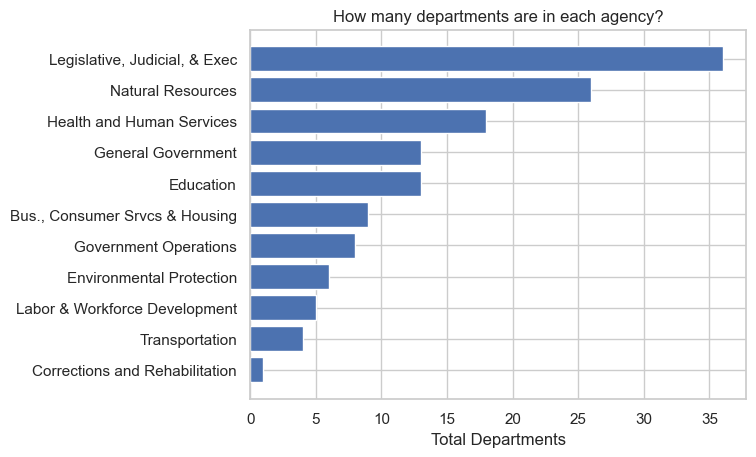

In [65]:
# Set bar chart using dataframe 'count_DeptsPerAgency_df'
fig, ax = plt.subplots()

ax.barh(count_DeptsPerAgency_df['Agencies'], count_DeptsPerAgency_df['CountDepts'])
ax.invert_yaxis()
ax.set_title('How many departments are in each agency?')
ax.set_xlabel('Total Departments')
plt.show()

#### <b>2</b> - Visualization 2: Using <i>seaborn</i>

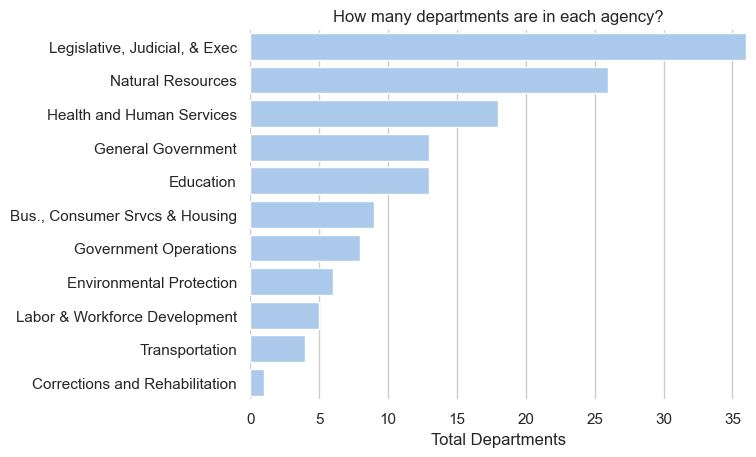

In [66]:
sn.set_theme(style = 'whitegrid')

# Initialize the matplotlib figure
f, ax = plt.subplots()

# Plot the data
sn.set_color_codes("pastel")
sn.barplot(x = 'CountDepts',
           y = 'Agencies',
           orient = 'h',
           data = count_DeptsPerAgency_df,
           color = "b")

# Add axis labels
ax.set(xlim=(0 , count_DeptsPerAgency_df['CountDepts'].max()),
       title="How many departments are in each agency?",
       ylabel="",
       xlabel="Total Departments")
sn.despine(left = True,
           bottom = True)

### <b>3</b> - What is the total vendor payment amount for each agency? For each department?

#### <b>3</b> - Method 1: Using a <i>For Loop</i>

In [67]:
# Make a list for all agencies
allAgencies_list = []
for agencies in budget_df['agency_name'].unique(): # Loop through column 'agency_name'
    allAgencies_list.append(agencies) # Add agency names to the list 'allAgencies_list'

# Make a list for all agencies' total vendor payment amount
agenciesMoney_list = []
for agencies in allAgencies_list:
    agenciesMoney_list.append(0)

# Make a list for all departments
allDepts_list = []
for depts in budget_df['department_name'].unique(): # Loop through column 'department_name'
    allDepts_list.append(depts) # Add department names to the list 'allDepts_list'

# Make a list for all departments' total vendor payment amount
deptsMoney_list = []
for depts in allDepts_list:
    deptsMoney_list.append(0)

In [68]:
# Iterate through the rows of 'budget_df' dataframe
for row in budget_df.iterrows():

    deptName = row[1][0] # Variable for department's name
    agencyName = row[1][1] # Variable for agency's name
    paymentAmount = row[1][2] # Variable for vendor payment amount
    
    if agencyName in allAgencies_list:
        agency_index = allAgencies_list.index(agencyName) # Get index of agency from list 'allAgencies_list'
        agenciesMoney_list[agency_index] += paymentAmount # Add agencies vendor payment amount
    
    if deptName in allDepts_list:
        dept_index = allDepts_list.index(deptName) # Get index of department from list 'allDepts_list'
        deptsMoney_list[dept_index] += paymentAmount # Add departments vendor payment amount

In [69]:
# Create dataframe of agencies total vendor payment amounts
agency_dict = {'Agencies' : allAgencies_list,
        'TotalVendorPaymentAmount' : agenciesMoney_list} # Create dictionary to hold agencies lists

agenciesPayment_df = pd.DataFrame(agency_dict) # Create dataframe from dictionary using function '.DataFrame'
agenciesPayment_df = agenciesPayment_df.sort_values(by=['TotalVendorPaymentAmount'], ascending = False)\
                .reset_index(drop = True) # Sort in descending value

# Create dataframe of agencies total vendor payment amounts
dept_dict = {'Agencies' : allDepts_list,
        'TotalVendorPaymentAmount' : deptsMoney_list} # Create dictionary to hold agencies lists

deptsPayment_df = pd.DataFrame(dept_dict) # Create dataframe from dictionary using function '.DataFrame'
deptsPayment_df = deptsPayment_df.sort_values(by=['TotalVendorPaymentAmount'], ascending = False)\
                .reset_index(drop = True)  # Sort in descending value

# Reformat float format to two decimal places in Pandas
pd.options.display.float_format = '{:.2f}'.format

In [70]:
# Display results
agenciesPayment_df.head()

,Agencies,TotalVendorPaymentAmount
0,Education,1957339912.48
1,Health and Human Services,617359252.32
2,Environmental Protection,258935945.55
3,Natural Resources,257407992.76
4,"Legislative, Judicial, & Exec",232477663.50


In [71]:
# Display results
deptsPayment_df.head()

,Agencies,TotalVendorPaymentAmount
0,Department of Education,1529180788.14
1,School Facilities Aid Program,336185188.65
2,State Dept Hlth Care Services,262169713.79
3,Dept Forestry & Fire Protectn,190971768.33
4,Department of Public Health,139471477.33


#### <b>3</b> - Method 2: Using Pandas <i>.groupby()</i>

In [72]:
# Dictionary for renaming columns in agencies dataframe
rename_dict = {'agency_name' : 'Agencies',
             'monetary_amount' : 'TotalVendorPaymentAmont'}

 # Use Pandas '.groupby' method to group by agencies and then sum on column 'monetary_amount'
agenciesPayment_df = budget_df.groupby(['agency_name'], as_index = False)\
                .sum()\
                .sort_values(by=['monetary_amount'], ascending=False)\
                .drop('department_name', axis = 1)\
                .reset_index(drop = True)\
                .rename(columns = rename_dict)

In [73]:
# Display results
agenciesPayment_df.head()

,Agencies,TotalVendorPaymentAmont
0,Education,1957339912.48
1,Health and Human Services,617359252.32
2,Environmental Protection,258935945.55
3,Natural Resources,257407992.76
4,"Legislative, Judicial, & Exec",232477663.50


In [74]:
# Dictionary for renaming columns in agencies dataframe
rename_dict = {'department_name' : 'Departments',
             'monetary_amount' : 'TotalVendorPaymentAmont'}

 # Use Pandas '.groupby' method to group by agencies and then sum on column 'monetary_amount'
deptsPayment_df = budget_df.groupby(['department_name'], as_index = False)\
                .sum()\
                .sort_values(by=['monetary_amount'], ascending=False)\
                .drop('agency_name', axis = 1)\
                .reset_index(drop = True)\
                .rename(columns = rename_dict)

In [75]:
# Display results
deptsPayment_df.head()

,Departments,TotalVendorPaymentAmont
0,Department of Education,1529180788.14
1,School Facilities Aid Program,336185188.65
2,State Dept Hlth Care Services,262169713.79
3,Dept Forestry & Fire Protectn,190971768.33
4,Department of Public Health,139471477.33
